In [2]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import h5py
import flammkuchen as fl

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
from fig_4_helper import sort_ipsi_contra_arrays, reshape_feature_array, get_ipsi_contra_col
from fig_4_helper import catname

In [6]:
save_figure_path = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_3\supp\suppl_7')

In [7]:
master_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')
path_features = Path(master_path/ 'features_ipsi_contra.csv')
master_path, path_features

(WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data'),
 WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features_ipsi_contra.csv'))

In [11]:
l_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/ 'l_feature_vector_array.h5')
r_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/ 'r_feature_vector_array.h5')

In [19]:
l_periods_array = fl.load(master_path/ 'features'/ 'l_full_beats.h5')
l_half_beats_array = fl.load(master_path/ 'features'/ 'l_half_beats.h5')
r_periods_array = fl.load(master_path/ 'features'/ 'r_full_beats.h5')
r_half_beats_array = fl.load(master_path/ 'features'/ 'r_half_beats.h5')

In [8]:
path_tensors_ipsi = Path(master_path/ 'tensors'/ 'tensor_ipsi_contra.h5')
traces =  fl.load(path_tensors_ipsi)
ipsi_fin = traces[:, 1, :]
contra_fin = traces[:, 2, :]

In [35]:
features = pd.read_csv(path_features)
clusters = features.cluster
ipsi_fin_values = features.ipsi_fin.values

#### Read in amplitudes

In [12]:
l_reshaped_array, l_peaks_a_array, l_peaks_i_array, l_valleys_a_array, l_valleys_i_array = reshape_feature_array(l_feature_vector_array)
r_reshaped_array, r_peaks_a_array, r_peaks_i_array, r_valleys_a_array, r_valleys_i_array = reshape_feature_array(r_feature_vector_array)

Reshaped array shape: (11063, 4, 9)
Reshaped array shape: (11063, 4, 9)


#### Get max amplitude of fin

In [13]:
l_max_amp = np.nanmax(l_peaks_a_array,axis=1)
r_max_amp = np.nanmax(r_peaks_a_array,axis=1)

In [14]:
ipsi_max_amp, contra_max_amp = sort_ipsi_contra_arrays(l_max_amp, r_max_amp ,ipsi_fin_values)

### amplitude 1st and 2nd peak

In [15]:
ipsi_amp_1, contra_amp_1 = sort_ipsi_contra_arrays(l_peaks_a_array[:,0], r_peaks_a_array[:,0] ,ipsi_fin_values)

In [16]:
ipsi_amp_2, contra_amp_2 = sort_ipsi_contra_arrays(l_peaks_a_array[:,1], r_peaks_a_array[:,1] ,ipsi_fin_values)

### Get difference in amplitude 1st and 2nd peak

In [17]:
l_diff_peaks = np.diff(l_peaks_a_array, axis=1)[:,0]
r_diff_peaks = np.diff(r_peaks_a_array, axis=1)[:,0]

In [18]:
ipsi_diff_peaks, contra_diff_peaks = sort_ipsi_contra_arrays(l_diff_peaks, r_diff_peaks ,ipsi_fin_values)

#### Beats and halfbeats 

In [20]:
l_peaks_diff = l_periods_array[:,0]
r_peaks_diff = r_periods_array[:,0]

In [21]:
ipsi_peak_diff_1, contra_peak_diff_1 = sort_ipsi_contra_arrays(l_peaks_diff, r_peaks_diff ,ipsi_fin_values)

In [22]:
ipsi_peak_diff_2, contra_peak_diff_2 = sort_ipsi_contra_arrays(l_peaks_diff, r_peaks_diff ,ipsi_fin_values)

### Rework Dataframe into ipsi contra format

In [23]:
ipsi_durations, contra_durations = get_ipsi_contra_col(features, 'l_fin_duration', 'r_fin_duration', 'ipsi_fin')
ipsi_freqs, contra_freqs = get_ipsi_contra_col(features, 'l_fin_freqs', 'r_fin_freqs', 'ipsi_fin')
ipsi_osc, contra_osc = get_ipsi_contra_col(features, 'l_osc', 'r_osc', 'ipsi_fin')

#### Get corr ipsi contra fin

In [24]:
ispi_contra_corr = np.full((traces.shape[0], 1), np.nan)

for bout in range(traces.shape[0]):
    cross_ipsi_contra = np.corrcoef(ipsi_fin[bout, :], contra_fin[bout, :])
    ispi_contra_corr[bout] = cross_ipsi_contra[0][1]

In [25]:
ispi_contra_corr = ispi_contra_corr.flatten()

## Make Heatmap

In [26]:
column_names =  [
    'ipsi_n_oscillation', 'contra_n_oscillation',
    'ipsi_frequency', 'contra_frequency',
    'ipsi_max_amplitude', 'contra_max_amplitude', 
    'ipsi_fin_duration', 'contra_fin_duration',
    'ipsi_amp_diff_peaks', 'contra_amp_diff_peaks',
    'ipsi_amp_1', 'contra_amp_1',
    'ipsi_amp_2', 'contra_amp_2',
    'ipsi_t_diff_peak_1', 'contra_t_diff_peak_1',
    'ipsi_t_diff_peak_2', 'contra_t_diff_peak_2',
    'ispi_contra_correlation']

In [27]:
df = pd.DataFrame(np.asarray([
    ipsi_osc, contra_osc,
    ipsi_freqs, contra_freqs,
    ipsi_max_amp, contra_max_amp, 
    ipsi_durations, contra_durations, 
    ipsi_diff_peaks, contra_diff_peaks,
    ipsi_amp_1, contra_amp_1,
    ipsi_amp_2, contra_amp_2,
    ipsi_peak_diff_1, contra_peak_diff_2,
    ipsi_peak_diff_2, contra_peak_diff_2,
    ispi_contra_corr]).T, columns=column_names)

df.head()

,ipsi_n_oscillation,contra_n_oscillation,ipsi_frequency,contra_frequency,ipsi_max_amplitude,contra_max_amplitude,ipsi_fin_duration,contra_fin_duration,ipsi_amp_diff_peaks,contra_amp_diff_peaks,ipsi_amp_1,contra_amp_1,ipsi_amp_2,contra_amp_2,ipsi_t_diff_peak_1,contra_t_diff_peak_1,ipsi_t_diff_peak_2,contra_t_diff_peak_2,ispi_contra_correlation
0,4.0,3.0,0.109756,0.105263,0.798017,0.340697,28.0,27.0,0.210910,0.077020,0.465832,0.263677,0.676743,0.340697,0.040,0.045,0.040,0.045,0.138358
1,2.0,2.0,0.119048,0.117647,0.432741,0.296224,19.0,15.0,-0.148951,0.145172,0.432741,0.151052,0.283789,0.296224,0.040,0.035,0.040,0.035,-0.085082
2,3.0,2.0,0.104167,0.115385,0.620835,0.431473,27.0,16.0,0.245164,-0.083179,0.369907,0.431473,0.615071,0.348294,0.045,0.045,0.045,0.045,0.011863
3,4.0,2.0,0.117647,0.117647,0.569168,0.534200,35.0,16.0,0.173791,0.010773,0.395376,0.523427,0.569168,0.534200,0.040,0.035,0.040,0.035,0.129337
4,3.0,3.0,0.103448,0.116667,0.606922,0.503003,22.0,23.0,0.039418,0.119273,0.567504,0.251714,0.606922,0.370987,0.040,0.040,0.040,0.040,-0.017081


In [28]:
scaler = MinMaxScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [29]:
tick_borders = []
add = 0
for i in range(11):
    n = features[features.cluster ==i].shape[0]
    add += n
    tick_borders.append(add)

print (tick_borders)

[1572, 2066, 4162, 5124, 6952, 9056, 10582, 10803, 10809, 11031, 11063]


In [30]:
df.to_csv(master_path /'heatmap_features.csv', index=False)
df_standardized.to_csv(master_path /'heatmap_norm.csv', index=False)

In [31]:
df_standardized['cluster'] = clusters

In [32]:
# Group by 'cluster' column and calculate the mean for each group
cluster_means = df_standardized.groupby('cluster').mean()

### Set parameters

In [33]:
alph=0.03
dot_size=1
cm = 1/2.54  # centimeters in inches
f_size = 6
dpi=600
lw=0.5

## Plot

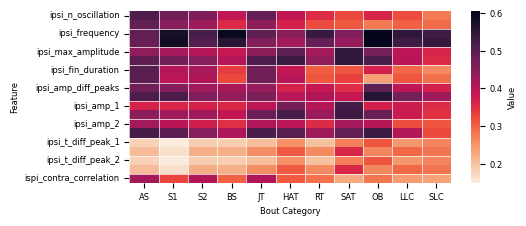

In [34]:
# Plotting the transposed heatmap
fig, ax = plt.subplots(figsize=(14*cm, 6*cm), facecolor='None')
sns.heatmap(cluster_means.T, ax=ax, annot=False, cmap='rocket_r',cbar_kws={'label': 'Value'})

# Adjust the y-axis
ax.set_xlabel('Bout Category', fontsize=f_size)
ax.set_xticklabels(catname, rotation=0, fontsize=f_size)
# Adjust the y-axis
ax.set_ylabel('Feature', fontsize=f_size)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=f_size)

# Adjust the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=f_size)  # Set the font size for colorbar tick labels
cbar.set_label('Value', fontsize=f_size)  # Set the font size for the colorbar label

ax.axhline(2, c='w', lw=lw)
ax.axhline(4, c='w', lw=lw)
ax.axhline(6, c='w', lw=lw)
ax.axhline(8, c='w', lw=lw)
ax.axhline(10, c='w', lw=lw)
ax.axhline(12, c='w', lw=lw)
ax.axhline(14, c='w', lw=lw)
ax.axhline(16, c='w', lw=lw)
ax.axhline(18, c='w', lw=lw)
ax.axhline(20, c='w', lw=lw)

for i in range(11):
    ax.axvline(i, c='w', lw=lw)
    
plt.tight_layout()
fig.savefig(save_figure_path /'heatmap_features_bout_cat_mean.pdf', dpi=dpi)
fig.savefig(save_figure_path /'heatmap_features_bout_cat_mean.png', dpi=dpi)